<a href="https://colab.research.google.com/github/snehabn/thinkful_capstone4/blob/main/Capstone4_SN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Change Case Study

Sneha Narasimhan

Thinkful Data Science Capstone 4

## Introduction

Climate change has impacted most regions of the world. The environment, the general public, industries, and even the economy have been affected by global warming and/or cooling. The gradual change in the Earth’s orbit affects the cycles of weather patterns over many millennia [1]. With the advent of rapidly growing technology and industries, humans are quickly and forcefully contributing to the changing climate. The creation of industry-related “atmospheric gases that have trapped more of the Sun’s energy in the Earth system” contributes significantly to the warming of all levels of the environment [1]. Global temperatures on the rise can lead to major climate disasters and displacement of entire communities and wildlife, disrupting livelihoods, economies, and environments. These events can be foreseen or prevented altogether.

This case study will use the [Jena Climate Dataset](https://www.kaggle.com/datasets/mnassrib/jena-climate/) available on Kaggle to further investigate the target variable of air temperature and other dependent variables over a seven-year time span [2]. This data was recorded at the “Weather Station of the Max Planck Institute for Biogeochemistry in Jena, Germany” [2].

---

## Data Setup

In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
from datetime import datetime,timedelta

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss,acf,pacf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('jena_climate_2009_2016.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [ ]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
df.isnull().any()

Date Time          False
p (mbar)           False
T (degC)           False
Tpot (K)           False
Tdew (degC)        False
rh (%)             False
VPmax (mbar)       False
VPact (mbar)       False
VPdef (mbar)       False
sh (g/kg)          False
H2OC (mmol/mol)    False
rho (g/m**3)       False
wv (m/s)           False
max. wv (m/s)      False
wd (deg)           False
dtype: bool

Reformatting `'Date Time'` column into proper format and addin in a year and month column for future analysis.

In [ ]:
df['Date Time'] = pd.to_datetime(df['Date Time'], format = "%d.%m.%Y %H:%M:%S" ) #change date time format
df['Year'] = df['Date Time'].dt.year
df['Month'] = df['Date Time'].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420551 non-null  datetime64[ns]
 1   p (mbar)         420551 non-null  float64       
 2   T (degC)         420551 non-null  float64       
 3   Tpot (K)         420551 non-null  float64       
 4   Tdew (degC)      420551 non-null  float64       
 5   rh (%)           420551 non-null  float64       
 6   VPmax (mbar)     420551 non-null  float64       
 7   VPact (mbar)     420551 non-null  float64       
 8   VPdef (mbar)     420551 non-null  float64       
 9   sh (g/kg)        420551 non-null  float64       
 10  H2OC (mmol/mol)  420551 non-null  float64       
 11  rho (g/m**3)     420551 non-null  float64       
 12  wv (m/s)         420551 non-null  float64       
 13  max. wv (m/s)    420551 non-null  float64       
 14  wd (deg)         420

This dataset is quite large, with 420,551 entries. For the purpose of this case study it makes sense to take a random sample of the dataset to continue with the analysis. Here we will take a random sample of 30% of the data.

In [ ]:
df = df.sample(n=126165)

Let's rename the columns to make them easier to work with for this case study.

In [ ]:
df.rename(columns={"Date Time":"date_time", "p (mbar)":"pressure", "T (degC)":"temp_C",
                  "Tpot (K)":"temp_K","Tdew (degC)":"dewpoint_C", "rh (%)":"rh",
                  "VPmax (mbar)":"VPmax", "VPact (mbar)":"VPact", "VPdef (mbar)":"VPdef",
                  "sh (g/kg)":"sh", "H2OC (mmol/mol)":"H2OC", "rho (g/m**3)":"rho",
                  "wv (m/s)": "wv", "max. wv (m/s)":"max_wv", "wd (deg)": "wind_direction"}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126165 entries, 55402 to 41346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date_time       126165 non-null  datetime64[ns]
 1   pressure        126165 non-null  float64       
 2   temp_C          126165 non-null  float64       
 3   temp_K          126165 non-null  float64       
 4   dewpoint_C      126165 non-null  float64       
 5   rh              126165 non-null  float64       
 6   VPmax           126165 non-null  float64       
 7   VPact           126165 non-null  float64       
 8   VPdef           126165 non-null  float64       
 9   sh              126165 non-null  float64       
 10  H2OC            126165 non-null  float64       
 11  rho             126165 non-null  float64       
 12  wv              126165 non-null  float64       
 13  max_wv          126165 non-null  float64       
 14  wind_direction  126165 non-null  

Here are the columns and their explanations:

|**Renamed Column**|**Old Column**  |    **Description**    |
|-----------|----------|:-------------|
|date_time| Date Time |  Date-time reference |
|pressure| p (mbar) |   The pascal SI derived unit of pressure used to quantify internal pressure. Meteorological reports typically state atmospheric pressure in millibars.   |
|temp_C| T (degC)  | Temperature in Celsius |
|temp_K| Tpot (K) | Temperature in Kelvin |
|dewpoint_C| Tdew (degC) |Temperature in Celsius relative to humidity. Dew Point is a measure of the absolute amount of water in the air, the DP is the temperature at which the air cannot hold all the moisture in it and water condenses. |
|rh| rh (%) | Relative Humidity is a measure of how saturated the air is with water vapor, the %RH determines the amount of water contained within collection objects.|
|VPmax| VPmax (mbar) | Saturation vapor pressure|
|VPact| VPact (mbar) | Vapor pressure |
|VPdef|VPdef (mbar) | Vapor pressure deficit |
|sh| sh (g/kg) | Specific humidity |
|H2OC| H2OC (mmol/mol) | Water vapor concentration |
|rho| rho (g/m**3) | Airtight|
|wv| wv (m/s) | 	Wind speed |
|max_wv| max. wv (m/s)| Maximum wind speed |
|wind_direction| wd (deg) | Wind direction in degrees|
|Year| Year  | Year Recorded |
|Month| Month  | Month Recorded |


[2]



We can see above that there are many parameters for analysis. While it would be very interesting to explore them all, for the scope of this capstone, we will drill down on a few features. To help with this decision making, let's look at a preliminary correlation heat map:

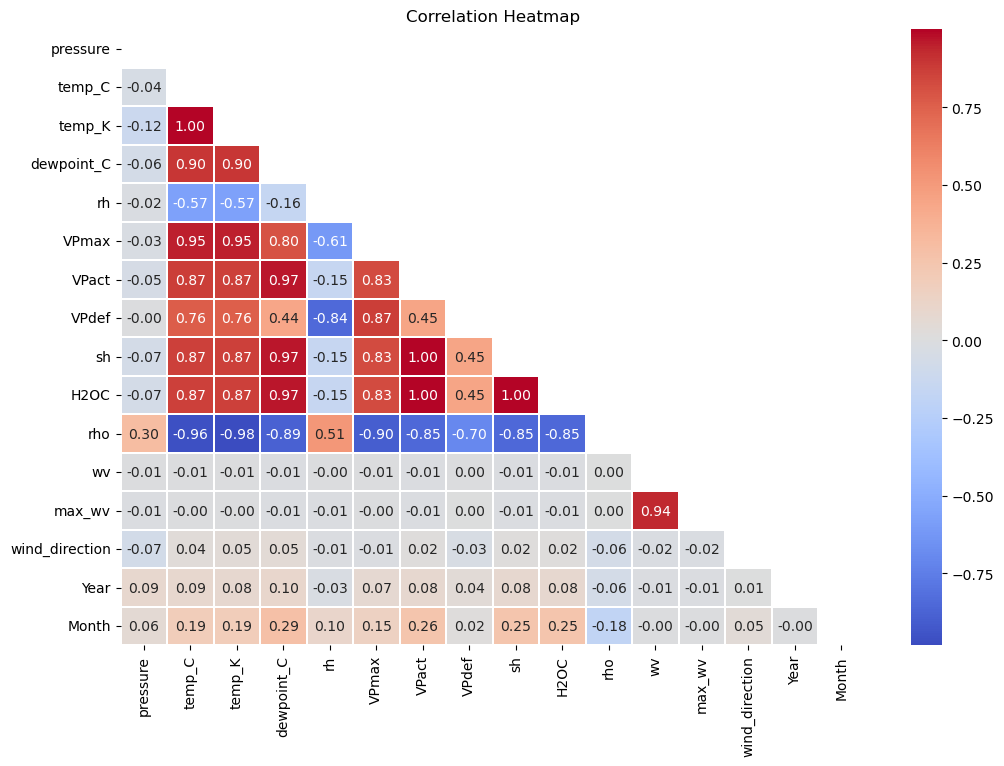

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Changing the matrix shape to remove redundant data
matrix = np.triu(df.corr())

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05, mask=matrix)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


This heatmap indicates that the original features with the weakest correlations are wind speed `'wv (m/s)'`,  max wind speed `'max. wv (m/s)'`, wind direction `'wd (deg)'`, realtive humidity `'rh (%)'`, and pressure `'p (mbar)'`.



In [ ]:
climate = df.copy()

In [ ]:
climate = climate.drop('wv', axis=1)

In [ ]:
climate = climate.drop('max_wv', axis=1)

In [ ]:
climate = climate.drop('wind_direction', axis=1)

In [ ]:
climate = climate.drop('pressure', axis=1)

In [ ]:
climate = climate.drop('rh', axis=1)

Additionally we will drop `'temp_K'` as it has a 1:1 relationship with `'temp_C'` and is essentially redundant information.

In [ ]:
climate = climate.drop('temp_K', axis=1)

In [ ]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126165 entries, 55402 to 41346
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date_time   126165 non-null  datetime64[ns]
 1   temp_C      126165 non-null  float64       
 2   dewpoint_C  126165 non-null  float64       
 3   VPmax       126165 non-null  float64       
 4   VPact       126165 non-null  float64       
 5   VPdef       126165 non-null  float64       
 6   sh          126165 non-null  float64       
 7   H2OC        126165 non-null  float64       
 8   rho         126165 non-null  float64       
 9   Year        126165 non-null  int64         
 10  Month       126165 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 11.6 MB


In [ ]:
climate = climate.drop_duplicates()

In [ ]:
climate.describe()

,temp_C,dewpoint_C,VPmax,VPact,VPdef,sh,H2OC,rho,Year,Month
count,126142.000000,126142.000000,126142.000000,126142.000000,126142.000000,126142.000000,126142.000000,126142.000000,126142.000000,126142.000000
mean,9.435089,4.942769,13.565188,9.530072,4.035051,6.020141,9.636552,1216.107996,2012.484882,6.506635
std,8.431311,6.747630,7.723130,4.195948,4.863653,2.663505,4.247117,39.987652,2.295737,3.447914
min,-22.630000,-24.710000,0.980000,0.810000,0.000000,0.510000,0.820000,1059.450000,2009.000000,1.000000
25%,3.320000,0.190000,7.750000,6.190000,0.870000,3.910000,6.270000,1187.410000,2010.000000,4.000000
50%,9.405000,5.200000,11.815000,8.850000,2.190000,5.590000,8.950000,1213.780000,2012.000000,7.000000
75%,15.490000,10.090000,17.620000,12.370000,5.300000,7.810000,12.500000,1242.840000,2014.000000,9.000000
max,36.870000,23.110000,62.370000,28.320000,44.800000,18.130000,28.820000,1391.620000,2016.000000,12.000000


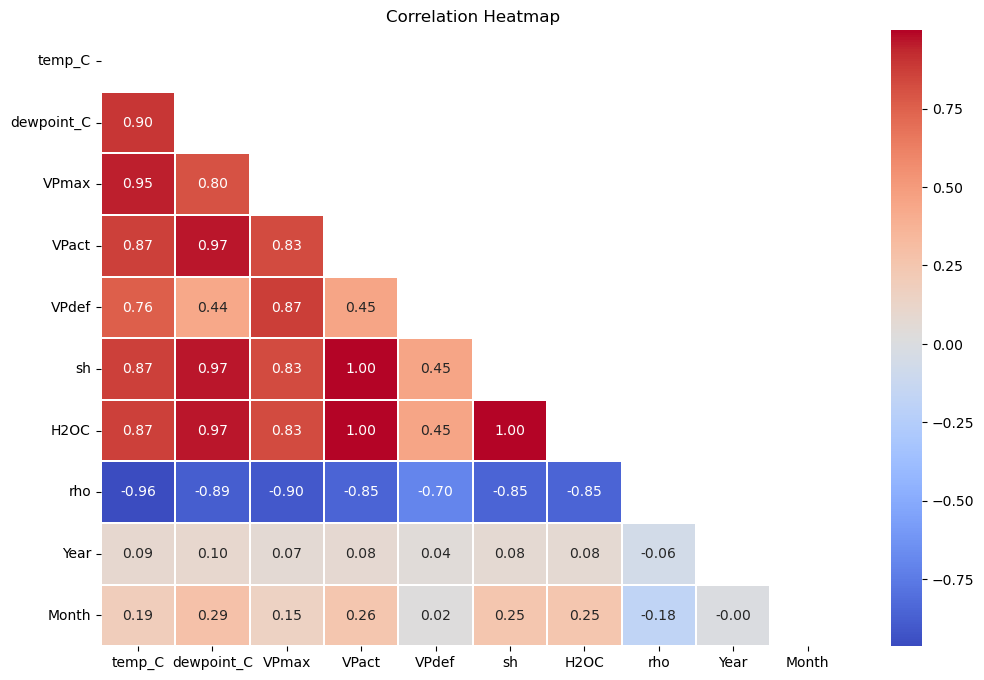

In [ ]:
# Calculate the correlation matrix
corr_matrix = climate.corr()

# Changing the matrix shape to remove redundant data
matrix = np.triu(climate.corr())

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05, mask=matrix)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Now that we have trimmed down the dataset, let's preview some of these relationships.

The target variable that we are investigating is `'temp_C'`, let's explore it's relationship with the other features.

R-squared: 0.804033


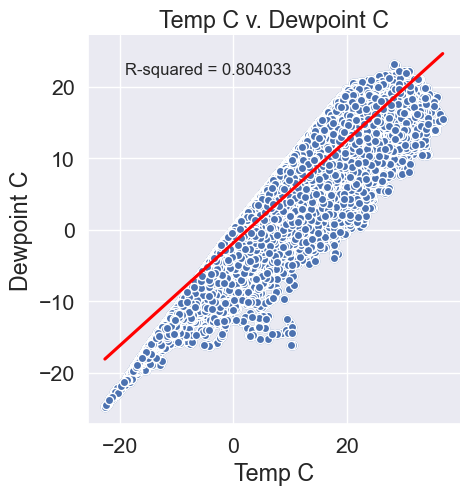

In [ ]:
from scipy import stats
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)


x = climate.temp_C
y = climate.dewpoint_C

res = stats.linregress(x,y)
print(f"R-squared: {res.rvalue**2:.6f}")

# lmplot --> Plot data and regression model fits across a FacetGrid.
sns.lmplot(x="temp_C", y="dewpoint_C", data=climate, ci=95, line_kws={'color': 'red'})
# Sets the current axis

ax = plt.gca()
ax.text(0.1, 0.9, f'R-squared = {res.rvalue**2:.6f}', transform=ax.transAxes, fontsize=12)

plt.scatter(x, y, edgecolors='white')
plt.title("Temp C v. Dewpoint C")
plt.xlabel("Temp C")
plt.ylabel("Dewpoint C")
plt.show()


In this scatter plot, we can see that the R-squared value is 0.80, indicating that there is a significant correlation between temperature and the dewpoint temperature.

R-squared: 0.906046


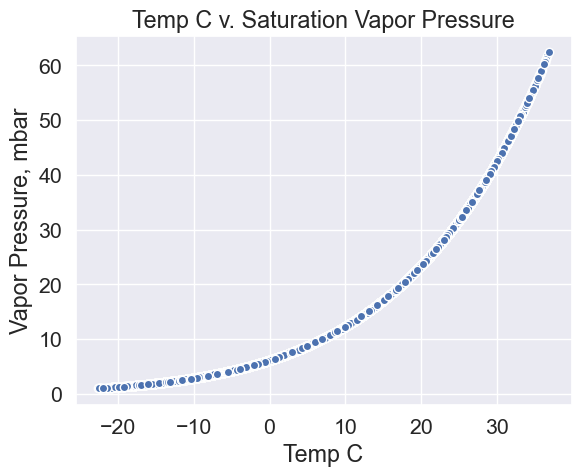

In [ ]:
x = climate.temp_C
y = climate.VPmax

res = stats.linregress(x,y)
print(f"R-squared: {res.rvalue**2:.6f}")

# lmplot --> Plot data and regression model fits across a FacetGrid.
#sns.lmplot(x="temp_C", y="VPmax", data=climate, ci=95, line_kws={'color': 'red'})
# Sets the current axis

#ax = plt.gca()
#ax.text(0.1, 0.9, f'R-squared = {res.rvalue**2:.6f}', transform=ax.transAxes, fontsize=12)

plt.scatter(x, y, edgecolors='white')
plt.title("Temp C v. Saturation Vapor Pressure")
plt.xlabel("Temp C")
plt.ylabel("Vapor Pressure, mbar")
plt.show()


R-squared: 0.754365


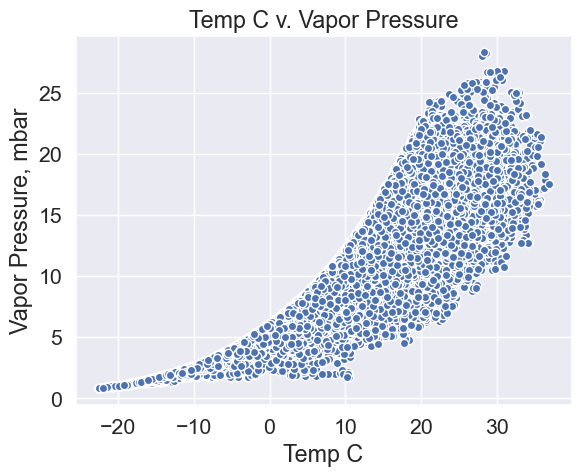

In [ ]:
x = climate.temp_C
y = climate.VPact

res = stats.linregress(x,y)

print(f"R-squared: {res.rvalue**2:.6f}")

# lmplot --> Plot data and regression model fits across a FacetGrid.
#sns.lmplot(x="temp_C", y="VPact", data=climate, ci=95, line_kws={'color': 'red'})

# Sets the current axis
#ax = plt.gca()
#ax.text(0.1, 0.9, f'R-squared = {res.rvalue**2:.6f}', transform=ax.transAxes, fontsize=12)

plt.scatter(x, y, edgecolors='white')
plt.title("Temp C v. Vapor Pressure")
plt.xlabel("Temp C")
plt.ylabel("Vapor Pressure, mbar")
plt.show()

R-squared: 0.580909


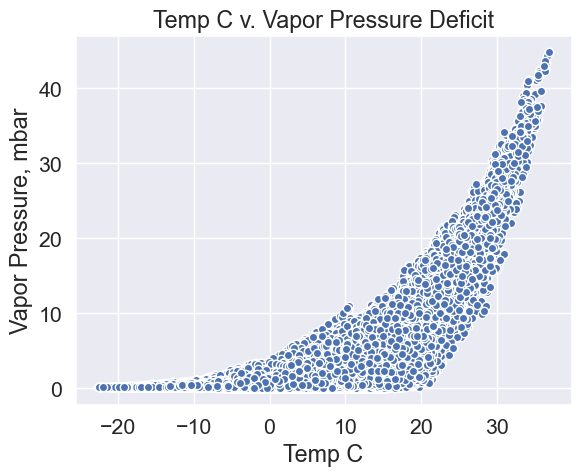

In [ ]:
x = climate.temp_C
y = climate.VPdef

res = stats.linregress(x,y)

print(f"R-squared: {res.rvalue**2:.6f}")

# lmplot --> Plot data and regression model fits across a FacetGrid.
#sns.lmplot(x="temp_C", y="VPdef", data=climate, ci=95, line_kws={'color': 'red'})

# Sets the current axis
#ax = plt.gca()
#ax.text(0.1, 0.9, f'R-squared = {res.rvalue**2:.6f}', transform=ax.transAxes, fontsize=12)

plt.scatter(x, y, edgecolors='white')
plt.title("Temp C v. Vapor Pressure Deficit")
plt.xlabel("Temp C")
plt.ylabel("Vapor Pressure, mbar")
plt.show()

R-squared: 0.752786


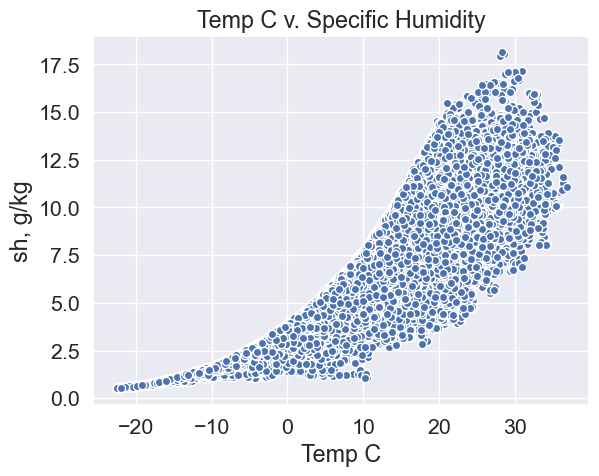

In [ ]:
x = climate.temp_C
y = climate.sh

res = stats.linregress(x,y)
print(f"R-squared: {res.rvalue**2:.6f}")

# lmplot --> Plot data and regression model fits across a FacetGrid.
#sns.lmplot(x="temp_C", y="sh", data=climate, ci=95, line_kws={'color': 'red'})
# Sets the current axis

#ax = plt.gca()
#ax.text(0.1, 0.9, f'R-squared = {res.rvalue**2:.6f}', transform=ax.transAxes, fontsize=12)

plt.scatter(x, y, edgecolors='white')
plt.title("Temp C v. Specific Humidity")
plt.xlabel("Temp C")
plt.ylabel("sh, g/kg")
plt.show()


R-squared: 0.753522


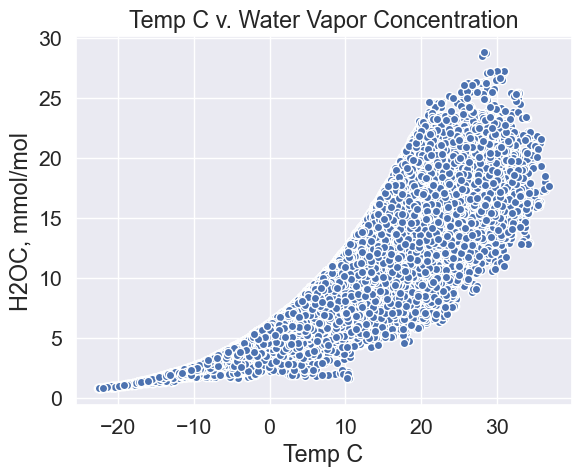

In [ ]:
x = climate.temp_C
y = climate.H2OC

res = stats.linregress(x,y)
print(f"R-squared: {res.rvalue**2:.6f}")

# lmplot --> Plot data and regression model fits across a FacetGrid.
#sns.lmplot(x="temp_C", y="H2OC", data=climate, ci=95, line_kws={'color': 'red'})
# Sets the current axis

#ax = plt.gca()
#ax.text(0.1, 0.9, f'R-squared = {res.rvalue**2:.6f}', transform=ax.transAxes, fontsize=12)

plt.scatter(x, y, edgecolors='white')
plt.title("Temp C v. Water Vapor Concentration")
plt.xlabel("Temp C")
plt.ylabel("H2OC, mmol/mol")
plt.show()


R-squared: 0.928161


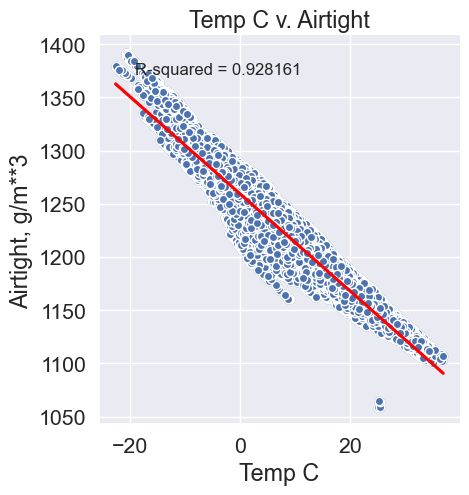

In [ ]:
x = climate.temp_C
y = climate.rho

res = stats.linregress(x,y)
print(f"R-squared: {res.rvalue**2:.6f}")

# lmplot --> Plot data and regression model fits across a FacetGrid.
sns.lmplot(x="temp_C", y="rho", data=climate, ci=95, line_kws={'color': 'red'})
# Sets the current axis

ax = plt.gca()
ax.text(0.1, 0.9, f'R-squared = {res.rvalue**2:.6f}', transform=ax.transAxes, fontsize=12)

plt.scatter(x, y, edgecolors='white')
plt.title("Temp C v. Airtight")
plt.xlabel("Temp C")
plt.ylabel("Airtight, g/m**3")
plt.show()


We also want to look at the average temperature per month per year.

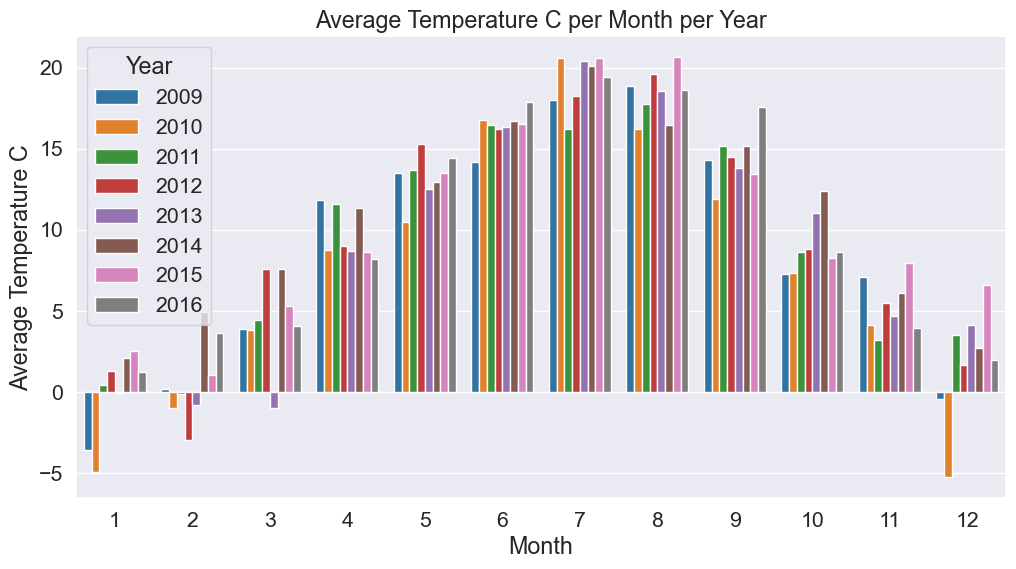

In [ ]:
average_temp_per_month = climate.groupby(['Year', 'Month'])['temp_C'].mean().reset_index()

# Create a line plot to visualize the average temperature per month per year
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x="Month", y="temp_C", hue="Year", data=average_temp_per_month, palette="tab10")


plt.title("Average Temperature C per Month per Year")
plt.xlabel("Month")
plt.ylabel("Average Temperature C")
plt.legend(title="Year", loc="upper left")


plt.show()


There is a lot in interesting information to look at in this graph. We can observe that the temperatures in the colder months seem to be increaseing over the years while in the warmer months there is not too much of a change. Let's drill down further and investigate.

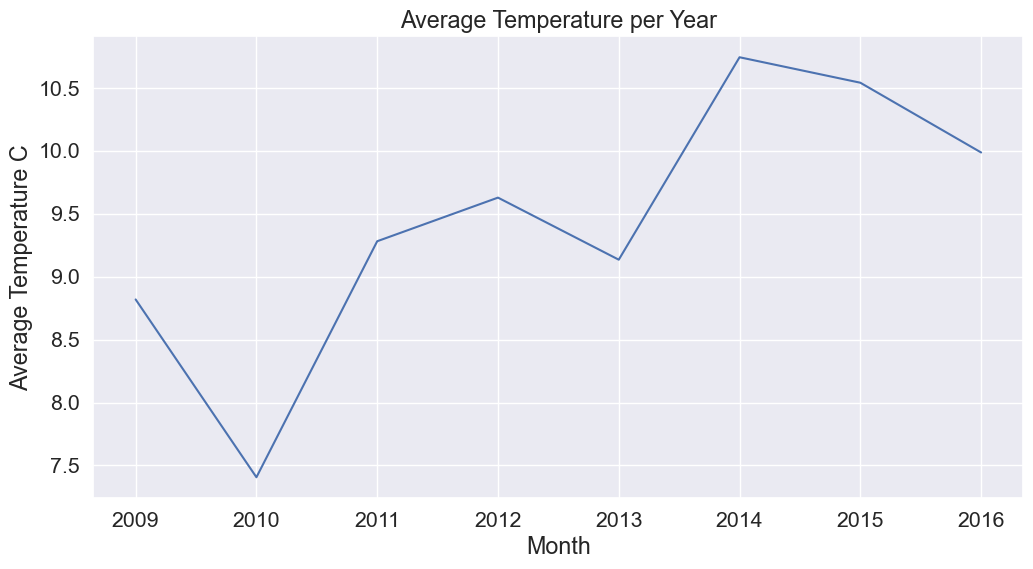

In [ ]:
average_temp_per_month = climate.groupby(['Year'])['temp_C'].mean().reset_index()

# Create a line plot to visualize the average temperature per month per year
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(x="Year", y="temp_C", data=average_temp_per_month, palette="tab10")


plt.title("Average Temperature per Year")
plt.xlabel("Month")
plt.ylabel("Average Temperature C")

plt.show()


Here we can see that there is a general upward trend in the average temperature per year.

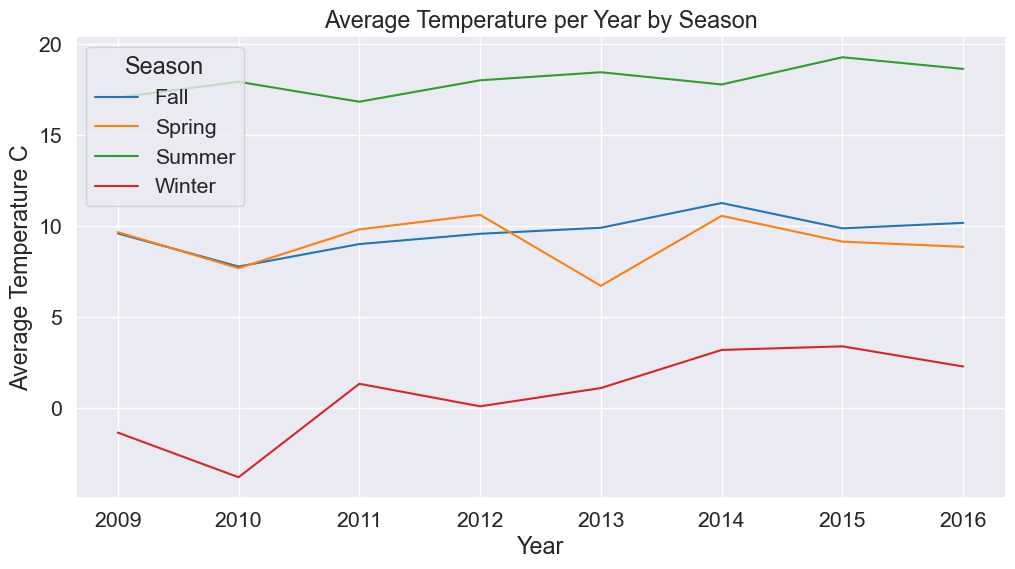

In [ ]:
month_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}

#create a season column
climate['Season'] = climate['Month'].map(month_season)

average_temp_per_season = climate.groupby(['Year', 'Season'])['temp_C'].mean().reset_index()

# Create a bar plot to visualize the average temperature per season per year
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(x="Year", y="temp_C", hue="Season", data=average_temp_per_season, palette="tab10")

plt.title("Average Temperature per Year by Season")
plt.xlabel("Year")
plt.ylabel("Average Temperature C")
plt.legend(title="Season", loc="upper left")

plt.show()

We can see a general upward trend of temperatures across the four seasons over the years.

Let's finally also observe what each feature's distribution looks like overall:

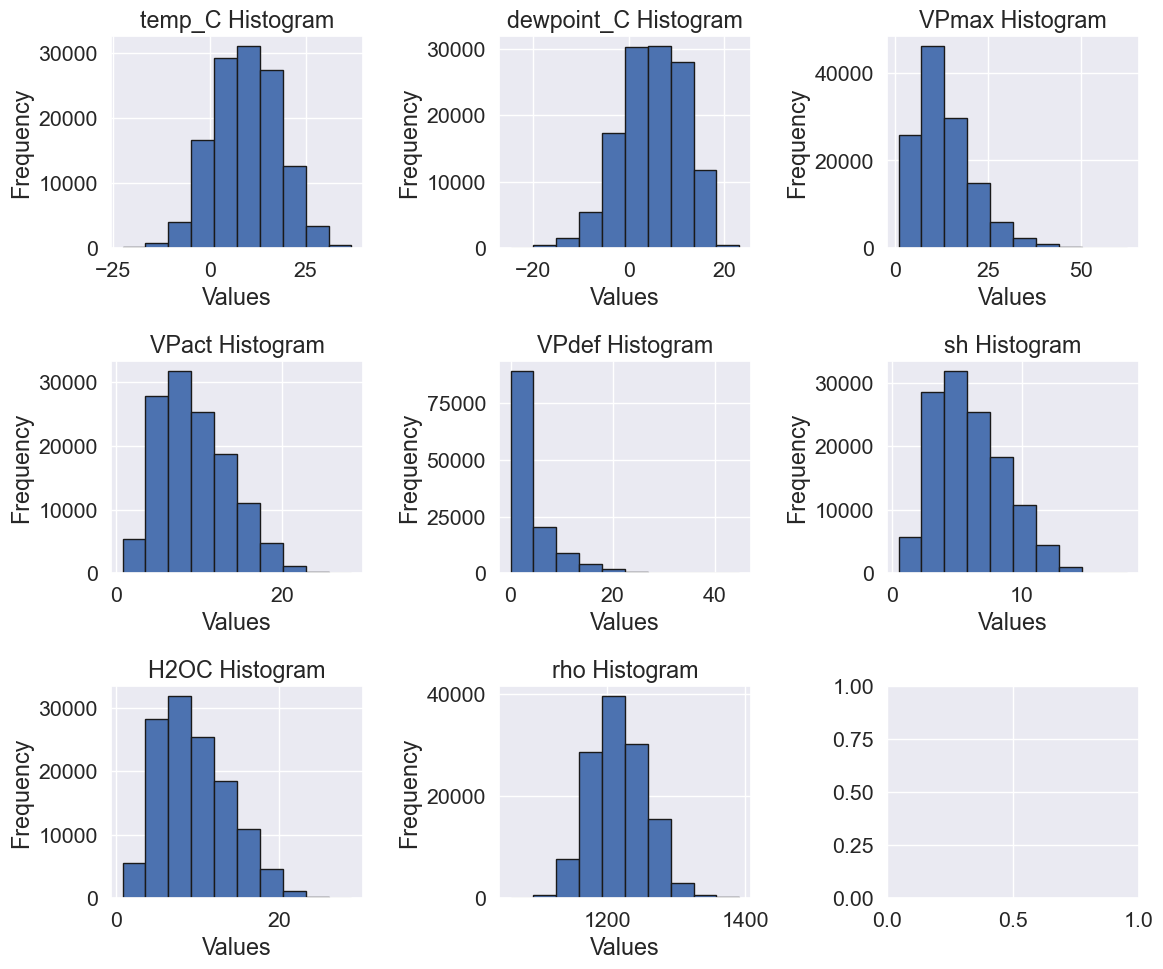

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
columns_to_plot = ['temp_C','dewpoint_C', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC', 'rho']

for i in range(3):
    for j in range(3):
        if len(columns_to_plot) > 0:
            column = columns_to_plot.pop(0)
            axes[i, j].hist(df[column], bins=10, edgecolor='k')
            axes[i, j].set_title(f'{column} Histogram')
            axes[i, j].set_xlabel('Values')
            axes[i, j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Just from a visual inspection we can see that `'T (degC)'` and `'rho (g/m**3)'` have normal distribution.

### Data Downsampling

In [ ]:
climate_2 = climate.copy(deep = True)
climate_2.set_index('date_time', inplace=True,drop =False )

# resample for one day
day_target = climate_2.resample('1D').mean().reset_index()
day_target = day_target.fillna(0)
day_target.set_index('date_time', inplace = True, drop = False)
day_target.head()

target = 'temp_C'

### Check for Stationary

Augmented Dickey-Fuller Test:

Null Hypothesis, H0: The time series is not stationary.

Alternative Hypothesis, H1: The time series is stationary.

In [ ]:
# Import adfuller
from statsmodels.tsa.stattools import adfuller

result = adfuller(day_target[target])
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -4.04
5% Critical Value: -2.86
p-value: 0.00


Temperature is stationary since test statistic is less than critical values and the p-value is less than 0.5.

In [ ]:
ratio = 0.8
train_data = day_target[:int(ratio*(len(day_target)))]
test_data = day_target[int(ratio*(len(day_target))):]

### Autocorrelation

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


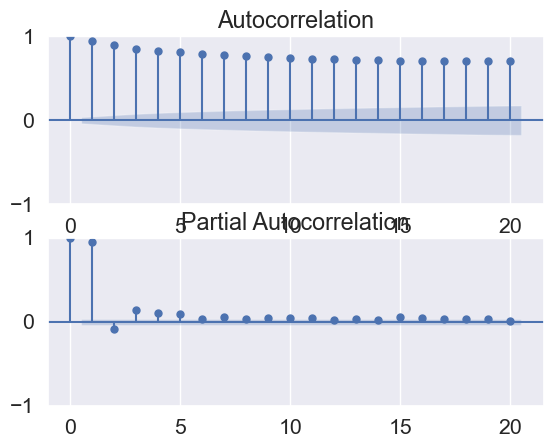

In [ ]:
# ACF & PACF Plots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

climate_2=climate_2.dropna()
plt.figure()
plt.subplot(211)
plot_acf(day_target[target], ax=plt.gca(), lags = 20)
plt.subplot(212)
plot_pacf(day_target[target], ax=plt.gca(), lags = 20)
plt.show()

### ARIMA models testing

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_111 = ARIMA(day_target[target], order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 temp_C   No. Observations:                 2922
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6737.606
Date:                Fri, 10 Nov 2023   AIC                          13481.212
Time:                        13:17:22   BIC                          13499.151
Sample:                    01-01-2009   HQIC                         13487.673
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7863      0.023     34.820      0.000       0.742       0.831
ma.L1         -0.9259      0.014    -68.191      0.000      -0.953      -0.899
sigma2         5.9018      0.140     42.145      0.0

In [ ]:
# Fit ARIMA(0,1,0) model
model_010 = ARIMA(day_target[target], order=(0,1,0))
model_010_fit = model_010.fit()

# Print model summary and residuals description
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:                 temp_C   No. Observations:                 2922
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6810.161
Date:                Fri, 10 Nov 2023   AIC                          13622.321
Time:                        13:17:22   BIC                          13628.301
Sample:                    01-01-2009   HQIC                         13624.475
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.2029      0.135     45.998      0.000       5.939       6.467
Ljung-Box (L1) (Q):                  10.57   Jarque-Bera (JB):                98.38
Prob(Q):                              0.00   Pr

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


To find the find the optimal ARIMA model, we use `'pmdarima`' to run ARIMA multiple times with multiple parameters  [3].

In [ ]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import warnings
warnings.filterwarnings('default')

In [ ]:
from pylab import rcParams
import statsmodels.api as sm

import pmdarima as pm

model = pm.auto_arima(train_data[target], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic


/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10812.494, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16274.013, Time=0.04 sec


/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10833.067, Time=0.21 sec


/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13880.858, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18226.616, Time=0.03 sec


/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10804.347, Time=0.74 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=10818.159, Time=0.34 sec


/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=10688.799, Time=2.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=10775.259, Time=0.64 sec


/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=10690.606, Time=2.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=10690.650, Time=1.83 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10692.373, Time=1.51 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=10741.807, Time=0.54 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=10689.826, Time=2.51 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=10692.731, Time=0.61 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 14.101 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2337
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -5338.400
Date:                Fri, 10 Nov 2023   AIC                          10688.799
Time:                        13:17:43   BIC                          10723.339
Sample:                    01-01-2009   HQIC                         10701.382
                         - 05-26-2015         

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [ ]:
# Fit ARIMA(0,1,0) model
model_301 = ARIMA(day_target[target], order=(3,0,1))
model_301_fit = model_301.fit()

# Print model summary and residuals description
print(model_301_fit.summary())
print('Residuals Description')
print(model_301_fit.resid.describe())

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 temp_C   No. Observations:                 2922
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -6683.875
Date:                Fri, 10 Nov 2023   AIC                          13379.750
Time:                        13:17:44   BIC                          13415.630
Sample:                    01-01-2009   HQIC                         13392.673
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0437      1.929      4.689      0.000       5.263      12.824
ar.L1          1.8658      0.026     71.862      0.000       1.815       1.917
ar.L2         -1.0659      0.035    -30.720      0.0

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


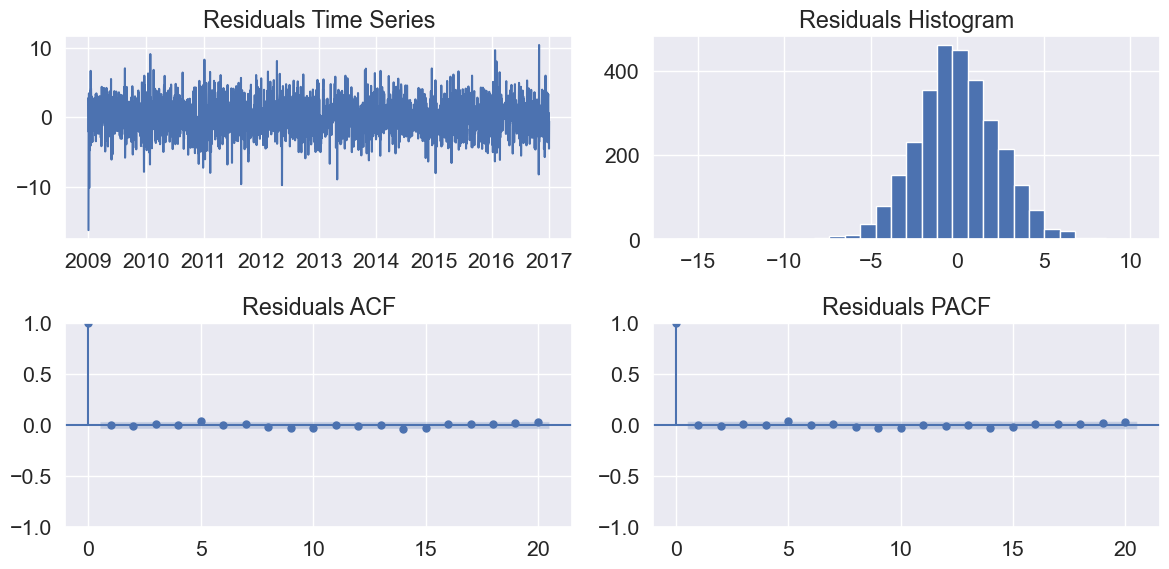

In [ ]:
# Check residuals
residuals = model_301_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
plt.plot(residuals)
plt.title('Residuals Time Series')
plt.subplot(2,2,2)
plt.hist(residuals, bins=30)
plt.title('Residuals Histogram')
plt.subplot(2,2,3)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Residuals ACF')
plt.subplot(2,2,4)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Residuals PACF')
plt.tight_layout()
plt.show()# Check residuals

We can observe that the residuals fluctuate around a mean of 0, and there is uniform variance. The residuals histogram also shows a normal distribution with a mean centered at 0. The resdiual ACF and PACF plots show these residual errors do not have an autocorrelation.

### Running the forecast model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA() model
model = ARIMA(day_target[target], order=(3,0,1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=50)

# Print forecast values
print('Forecast:')
print(forecast)

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast:
2017-01-01   -1.246075
2017-01-02   -0.061672
2017-01-03    0.739576
2017-01-04    1.224142
2017-01-05    1.508003
2017-01-06    1.679306
2017-01-07    1.792011
2017-01-08    1.875740
2017-01-09    1.945646
2017-01-10    2.009077
2017-01-11    2.069443
2017-01-12    2.128259
2017-01-13    2.186177
2017-01-14    2.243463
2017-01-15    2.300222
2017-01-16    2.356494
2017-01-17    2.412295
2017-01-18    2.467631
2017-01-19    2.522507
2017-01-20    2.576926
2017-01-21    2.630891
2017-01-22    2.684406
2017-01-23    2.737475
2017-01-24    2.790101
2017-01-25    2.842288
2017-01-26    2.894039
2017-01-27    2.945359
2017-01-28    2.996250
2017-01-29    3.046717
2017-01-30    3.096762
2017-01-31    3.146390
2017-02-01    3.195603
2017-02-02    3.244406
2017-02-03    3.292802
2017-02-04    3.340794
2017-02-05    3.388385
2017-02-06    3.435579
2017-02-07    3.482380
2017-02-08    3.528790
2017-02-09    3.574812
2017-02-10    3.620450
2017-02-11    3.665708
2017-02-12    3.710588
2

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 temp_C   No. Observations:                 2922
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -6683.875
Date:                Fri, 10 Nov 2023   AIC                          13379.750
Time:                        13:17:46   BIC                          13415.630
Sample:                    01-01-2009   HQIC                         13392.673
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0437      1.929      4.689      0.000       5.263      12.824
ar.L1          1.8658      0.026     71.862      0.000       1.815       1.917
ar.L2         -1.0659      0.035    -30.720      0.0

In [ ]:
model = sm.tsa.arima.ARIMA(train_data[target], order=(3,0,1))
result = model.fit()
print(result.summary())



/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 temp_C   No. Observations:                 2337
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -5338.408
Date:                Fri, 10 Nov 2023   AIC                          10688.815
Time:                        13:17:48   BIC                          10723.355
Sample:                    01-01-2009   HQIC                         10701.398
                         - 05-26-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7553      2.050      4.271      0.000       4.738      12.773
ar.L1          1.8484      0.031     60.448      0.000       1.788       1.908
ar.L2         -1.0520      0.039    -26.761      0.0

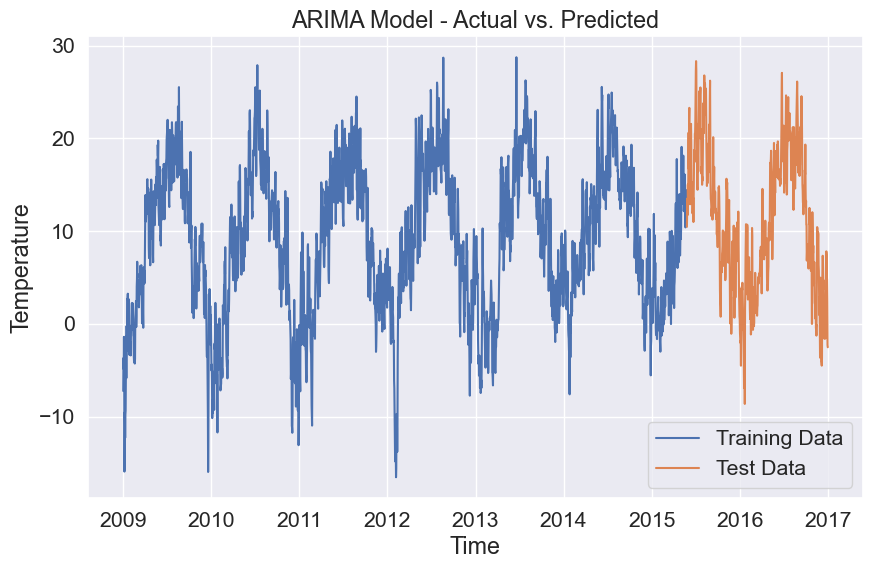

In [ ]:
# Fit the ARIMA model
model_fit = model.fit()

# Get the predicted values
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False, typ='levels')

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data[target], label='Training Data')
plt.plot(test_data[target], label='Test Data')
#plt.plot(predictions, label='Predictions', color='red')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

We can see here the predicted model appears to follow a similar pattern as the training data.

### ML Testing

Here we will employ the Random Forest Model to further see which additional features are of interest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV

In [ ]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126142 entries, 55402 to 41346
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date_time   126142 non-null  datetime64[ns]
 1   temp_C      126142 non-null  float64       
 2   dewpoint_C  126142 non-null  float64       
 3   VPmax       126142 non-null  float64       
 4   VPact       126142 non-null  float64       
 5   VPdef       126142 non-null  float64       
 6   sh          126142 non-null  float64       
 7   H2OC        126142 non-null  float64       
 8   rho         126142 non-null  float64       
 9   Year        126142 non-null  int64         
 10  Month       126142 non-null  int64         
 11  Season      126142 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 12.5+ MB


In [ ]:
climate['date_time'] = climate['date_time'].astype('str')

In [ ]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126142 entries, 55402 to 41346
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date_time   126142 non-null  object 
 1   temp_C      126142 non-null  float64
 2   dewpoint_C  126142 non-null  float64
 3   VPmax       126142 non-null  float64
 4   VPact       126142 non-null  float64
 5   VPdef       126142 non-null  float64
 6   sh          126142 non-null  float64
 7   H2OC        126142 non-null  float64
 8   rho         126142 non-null  float64
 9   Year        126142 non-null  int64  
 10  Month       126142 non-null  int64  
 11  Season      126142 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 12.5+ MB


In [ ]:
climate = climate.copy()

for column in climate.columns:
    if climate[column].dtype == 'object':
        climate[column + '_encoded'] = climate[column].astype('category').cat.codes
        climate.drop(column, axis=1, inplace=True)

In [ ]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126142 entries, 55402 to 41346
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   temp_C             126142 non-null  float64
 1   dewpoint_C         126142 non-null  float64
 2   VPmax              126142 non-null  float64
 3   VPact              126142 non-null  float64
 4   VPdef              126142 non-null  float64
 5   sh                 126142 non-null  float64
 6   H2OC               126142 non-null  float64
 7   rho                126142 non-null  float64
 8   Year               126142 non-null  int64  
 9   Month              126142 non-null  int64  
 10  date_time_encoded  126142 non-null  int32  
 11  Season_encoded     126142 non-null  int8   
dtypes: float64(8), int32(1), int64(2), int8(1)
memory usage: 11.2 MB


In [ ]:
print((climate.isnull().sum() / len(climate)) * 100)

temp_C               0.0
dewpoint_C           0.0
VPmax                0.0
VPact                0.0
VPdef                0.0
sh                   0.0
H2OC                 0.0
rho                  0.0
Year                 0.0
Month                0.0
date_time_encoded    0.0
Season_encoded       0.0
dtype: float64


Use Random Forest Model to determine feature importance.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = climate.drop('temp_C', axis=1)
y = climate['temp_C']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:

importances = rf.feature_importances_
num_top_features = 5
sorted_idx = importances.argsort()[-num_top_features:]
top_features = X.columns[sorted_idx]



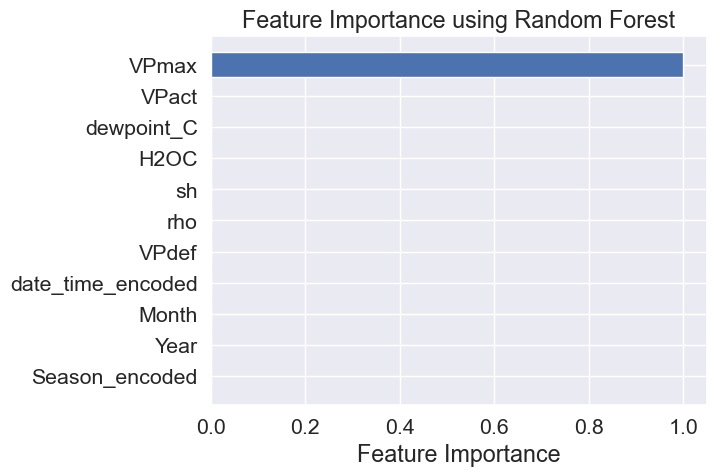

In [ ]:
sorted_idx = importances.argsort()
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

We can see here that in `'VPmax'`, which is saturation vapor pressure is also considered an important feature to consider.

## Conclusion

In this case study we looked at the target variable of temperature in celsius and observed its relationship to other dependent variables. We used univariate time series models, to determine the optimal parameters for forecasting. We discovered that ARIMA(3,0,1) yielded the best results according to residuals.

In addition we employed the Random Forest model to determine what other features would be considered important to observe in a future possible multivariate time series analysis. We see that `'VPmax'` or saturation vapor pressure would be a valuable feature to include this this analysis.

## Citations

[1] NASA. (2018, September 21). Climate Change Evidence: How Do We Know? Climate Change: Vital Signs of the Planet. https://climate.nasa.gov/evidence/


[2] Mnassri, B. (2020). Jena Climate Dataset. www.kaggle.com. https://www.kaggle.com/datasets/mnassrib/jena-climate/data

[3] pmdarima.arima.auto_arima — pmdarima 1.5.3 documentation. (n.d.). Alkaline-Ml.com. https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html